---
title: "exercise-your-first-map"
author: "Hyeonho Jeong"
date: "2023-05-10"
categories: [code]
image: "image.png"
---

exercise-your-first-map 입니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.8 MB/s eta 0:00:00


In [2]:
!pip install learntools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement learntools (from versions: none)
ERROR: No matching distribution found for learntools


In [5]:
import geopandas as gpd

In [ ]:
from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex1 import *

In [ ]:
import geopandas as gpd

In [ ]:
import matplotlib.pyplot as plt

### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [9]:
#loans_filepath = "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"
loans_filepath = ("/content/drive/MyDrive/data_mining/data/kiva_loans/kiva_loans/kiva_loans.shp")

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

In [10]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

<ipython-input-10-8d5431ffd4fc>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

<ipython-input-13-23248e274c35>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


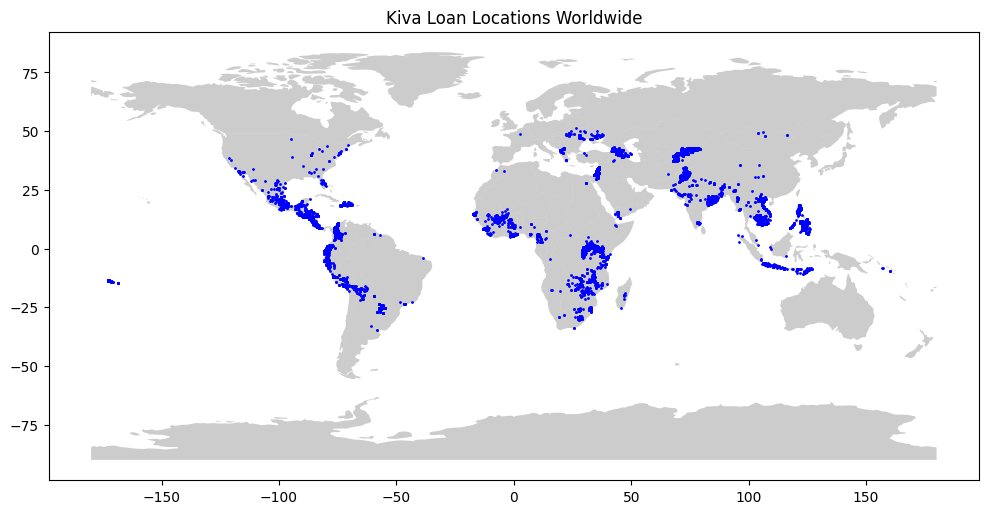

In [13]:
# Load the data
#world_loans = gpd.read_file(loans_filepath)
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)

# Plot the date
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
world.plot(ax=ax, alpha=0.4, color='grey')
world_loans.plot(ax=ax, markersize=1, color='blue', marker='o')
plt.title("Kiva Loan Locations Worldwide")
plt.show()

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [14]:
# Your code here
PHL_loans = world_loans[world_loans['country']=='Philippines']


### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [ ]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/content/drive/MyDrive/data_mining/Philippines_AL258.kml", driver='KML')
PHL.head()

In [ ]:
import geopandas as gpd

# Convert KML to GeoJSON using the `fiona` library
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
PHL_geojson = gpd.read_file('/content/drive/MyDrive/data_mining/Philippines_AL258.kml', driver='KML')
PHL_geojson.to_file('/content/drive/MyDrive/data_mining/Philippines_AL258.geojson', driver='GeoJSON')

# Read the converted GeoJSON file
PHL = gpd.read_file('/content/drive/MyDrive/data_mining/Philippines_AL258.geojson')



Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

In [ ]:
# Your code here
# Create a figure with size (12,8)
fig, ax = plt.subplots(figsize=(12,8))

# Plot Philippines map
PHL.plot(ax=ax, alpha=0.4, color='grey')

# Plot loans in the Philippines
PHL_loans.plot(ax=ax, markersize=1, color='blue', marker='o')

# Add title
ax.set_title('Kiva Loans in the Philippines', fontsize=20)

# Show the plot
plt.show()

Can you identify any islands where it might be useful to recruit new Field Partners?  Do any islands currently look outside of Kiva's reach?

You might find [this map](https://bit.ly/2U2G7x7) useful to answer the question.

# Keep going

Continue to learn about **[coordinate reference systems](https://www.kaggle.com/alexisbcook/coordinate-reference-systems)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*